- **Tarea del backlog:** https://github.com/UCM-GIDIA-PD1/c2425-R4/issues/26.
- **Propósito del código:** Transformaciones y primer modelo regresión logística.  
- **Autor(es):** Francisco Pastor.  
- **Descripción y uso:** Ejecutar para ver resultado de modelo regresión logística en P2.
- **Estado actual:** En revisión.


# REGRESIÓN LOGÍSTICA

In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#Leo los df divididos en orden cronológico de forma que los resultados sean lo más reales posibles
ruta_train =  os.path.join("..","..", "data", "processed","train.parquet")
df_train= pd.read_parquet(ruta_train)
df_train.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
0,2000-06-09,Kevin Randleman,Pedro Rizzo,False,0.0,0.8,0.279,0.315,0.770,0.000,...,0.0,0.0,0.8,0.0,-0.8,-0.036,0.615385,1.0,0.0,526.0
1,2000-09-22,Jeremy Horn,Eugene Jackson,False,0.0,0.5,0.696,0.550,0.084,0.000,...,0.0,0.5,0.0,0.0,-0.5,0.146,0.250000,0.4,0.0,3.3
2,2001-02-23,Tito Ortiz,Evan Tanner,False,0.3,0.0,0.552,0.741,0.874,1.000,...,0.0,0.0,0.0,0.0,0.3,-0.189,0.178571,-0.1,0.0,458.1
3,2001-05-04,Chuck Liddell,Kevin Randleman,False,0.0,0.0,0.508,0.532,0.000,0.758,...,1.0,0.0,0.0,1.0,0.0,-0.024,-0.518519,-1.5,0.2,-455.0
4,2001-06-29,Pat Miletich,Shonie Carter,False,0.0,1.0,0.451,0.521,0.500,0.646,...,0.5,0.0,0.0,0.0,-1.0,-0.070,0.037945,0.8,-1.2,-137.3


In [3]:
ruta_val = os.path.join("..","..", "data", "processed","validation.parquet")
df_val = pd.read_parquet(ruta_val)
df_val.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
0,2021-06-26,Yancy Medeiros,Damir Hadzovic,True,0.0,0.0,0.261,0.323,0.000,0.432,...,1.0,0.5,1.5,1.8,0.0,-0.062,-0.368421,0.0,0.3,-59.5
1,2021-07-10,Tai Tuivasa,Greg Hardy,False,0.8,0.3,0.661,0.544,0.000,0.300,...,1.0,0.0,1.0,1.0,0.5,0.117,-0.230769,0.0,0.0,-20.0
2,2021-07-10,Irene Aldana,Yana Santos,False,0.3,0.0,0.367,0.731,0.000,0.150,...,0.0,0.0,3.5,0.0,0.3,-0.364,-0.187500,0.0,-0.2,-437.6
3,2021-07-10,Dustin Poirier,Conor McGregor,False,0.5,0.3,0.518,0.558,0.542,0.000,...,2.0,2.0,1.0,0.0,0.2,-0.040,0.222222,1.4,0.0,64.3
4,2021-07-10,Gilbert Burns,Stephen Thompson,False,0.2,0.3,0.547,0.467,0.075,0.000,...,0.0,0.0,2.0,3.0,-0.1,0.080,0.122449,0.3,0.0,140.9


In [4]:
ruta_test =  os.path.join("..","..", "data", "processed","test.parquet")
df_test= pd.read_parquet(ruta_test)
df_test.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
0,2023-04-22,Rani Yahya,Montel Jackson,True,0.0,2.1,0.569,0.513,0.415,0.240,...,0.0,0.0,5.0,2.0,-2.1,0.056,0.047222,0.5,0.7,140.0
1,2023-04-22,Jeremiah Wells,Matthew Semelsberger,False,0.7,1.8,0.529,0.382,0.060,0.800,...,0.0,0.0,0.0,1.8,-1.1,0.147,-0.403226,0.3,0.0,-111.5
2,2023-04-29,Caio Borralho,Michal Oleksiejczuk,False,0.0,0.6,0.565,0.510,0.690,0.100,...,0.0,2.0,0.0,1.0,-0.6,0.055,0.370656,1.0,1.2,414.4
3,2023-04-29,Song Yadong,Ricky Simon,False,0.5,0.8,0.379,0.595,0.500,0.407,...,0.0,0.0,1.0,1.0,-0.3,-0.216,0.150000,-0.7,0.0,-244.9
4,2023-04-29,Rodolfo Vieira,Cody Brundage,False,0.0,0.3,0.528,0.214,0.305,0.700,...,1.0,0.0,0.5,1.0,-0.3,0.314,-0.393102,0.1,0.0,62.6


In [5]:
X_train = df_train.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER"])
y_train = df_train["WINNER"]
y_train.value_counts(normalize=True)

WINNER
False    0.618167
True     0.381833
Name: proportion, dtype: float64

In [6]:
X_val = df_val.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER"])
y_val = df_val["WINNER"]
y_val.value_counts(normalize=True)

WINNER
False    0.53167
True     0.46833
Name: proportion, dtype: float64

In [7]:
X_test = df_test.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER"])
y_test = df_test["WINNER"]
y_test.value_counts(normalize=True)

WINNER
False    0.551724
True     0.448276
Name: proportion, dtype: float64

En esta celda se escalan las variables numéricas utilizando RobustScaler, una técnica que transforma los datos usando la mediana y el rango intercuartílico, lo cual es útil para reducir el efecto de valores atípicos (outliers). Se aplica tanto al conjunto de entrenamiento, validación y test para mantener coherencia entre los datos. Esto mejora la estabilidad del modelo y la comparación entre variables que están en diferentes escalas.

In [8]:
scaler = RobustScaler()
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
# Aplicamos el RobustScaler
for var in numeric_cols:
    df_train[var] = scaler.fit_transform(df_train[var].values.reshape(-1, 1))
    df_val[var] = scaler.fit_transform(df_val[var].values.reshape(-1, 1))
    df_test[var] = scaler.fit_transform(df_test[var].values.reshape(-1, 1))

df_train.describe()

,DATE,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,SUB_ATT_A,SUB_ATT_B,REV_A,...,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
count,2433,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,...,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000
mean,2015-07-31 22:27:04.660912384,0.141965,0.185861,0.027601,0.023911,0.089700,0.090093,0.339978,0.388615,0.593917,...,0.552528,0.491369,0.227209,0.132450,-0.043896,0.003589,0.007893,-0.041689,-0.019194,0.041347
min,2000-06-09 00:00:00,-0.400000,-0.400000,-2.461538,-2.569343,-0.675676,-0.651042,-0.333333,-0.333333,0.000000,...,0.000000,0.000000,-0.500000,-0.500000,-4.800000,-2.566845,-2.089005,-5.714286,-2.500000,-4.024776
25%,2012-12-08 00:00:00,-0.400000,-0.400000,-0.503497,-0.496350,-0.459459,-0.440104,-0.333333,-0.333333,0.000000,...,0.000000,0.000000,-0.500000,-0.500000,-0.600000,-0.508021,-0.502618,-0.571429,0.000000,-0.477596
50%,2016-05-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018-12-01 00:00:00,0.600000,0.600000,0.496503,0.503650,0.540541,0.559896,0.666667,0.666667,1.000000,...,1.000000,1.000000,0.500000,0.500000,0.400000,0.491979,0.497382,0.428571,0.000000,0.522404
max,2021-06-26 00:00:00,5.000000,4.800000,3.279720,2.664234,2.027027,1.953125,7.166667,6.333333,12.000000,...,6.000000,6.000000,5.250000,4.900000,4.400000,3.213904,2.304328,6.428571,2.400000,3.940959
std,NaN,0.705303,0.753848,0.789077,0.764700,0.627253,0.609115,0.923736,0.976336,1.241714,...,0.880207,0.831711,0.783246,0.704107,0.972828,0.776431,0.722566,1.087454,0.359112,0.927260


En esta celda se define la función aplicarRFECV, que realiza selección automática de variables mediante RFECV (Recursive Feature Elimination con validación cruzada). Se utiliza regresión logística como estimador y StratifiedKFold para mantener el balance de clases en los folds. Este proceso elimina iterativamente las variables menos útiles, mejorando la generalización del modelo al quedarse solo con las más relevantes.

In [ ]:
from imblearn.pipeline import make_pipeline
# Semilla
SEED = 22

# Número de folds
CV_FOLDS = 5

def aplicarRFECV(X, y):
    
    MIN_FEATURES = 5
    METRICA = "balanced_accuracy"

    # Modelo de regresión logística
    modelo = LogisticRegression(max_iter = 5000, class_weight="balanced")

    cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=SEED)
   
    rfecv = RFECV(
        estimator=modelo,
        step=1,
        cv=cv,
        scoring=METRICA,
        min_features_to_select= MIN_FEATURES,
    )
    
    rfecv.fit(X, y)
    
    # Número óptimo de variables seleccionadas
    num_optimal_features = rfecv.n_features_
    print("Número óptimo de variables seleccionadas:", num_optimal_features)

    # Obtener índices de variables seleccionadas
    selected_feature_indices = rfecv.support_

    # Obtener nombres de variables seleccionadas
    selected_feature_names = [X.columns[i] for i, selected in enumerate(selected_feature_indices) if selected]
    
    # Tomado de https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
    n_scores = len(rfecv.cv_results_["mean_test_score"])
    plt.figure(figsize=(12, 6))
    plt.xlabel("Número de variables elegidas")
    plt.ylabel("Media balanced accuracy en test")
    plt.errorbar(
        range(MIN_FEATURES, n_scores + MIN_FEATURES),
        rfecv.cv_results_["mean_test_score"],
        yerr=rfecv.cv_results_["std_test_score"],
    )
    plt.title("RFE con validación cruzada")
    plt.show()
    
    return selected_feature_names

In [10]:
# y será la variable objetivo: 'WINNER'
y = df_train["WINNER"]

X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_test = pd.get_dummies(X_test)

# Alineamos columnas entre train y val/test (por si hay columnas diferentes luego del get_dummies)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [11]:
variables_descartadas = [v for v in X_train.columns if X_train[v].std() == 0]

X_train = X_train.drop(columns=variables_descartadas)
X_val = X_val.drop(columns=variables_descartadas)
X_test = X_test.drop(columns=variables_descartadas)

In [12]:
print("--- VARIABLES SELECCIONADAS ---")
print(X_train.columns.tolist())

--- VARIABLES SELECCIONADAS ---
['KD_A', 'KD_B', 'SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'TOTAL_STR_A_x', 'TOTAL_STR_B_x', 'TOTAL_STR_A_y', 'TOTAL_STR_B_y', 'TD_A_x', 'TD_B_x', 'TD_A_y', 'TD_B_y', 'STR_HEAD_A_x', 'STR_HEAD_B_x', 'STR_HEAD_A_y', 'STR_HEAD_B_y', 'STR_BODY_A_x', 'STR_BODY_B_x', 'STR_BODY_A_y', 'STR_BODY_B_y', 'STR_LEG_A_x', 'STR_LEG_B_x', 'STR_LEG_A_y', 'STR_LEG_B_y', 'STR_DISTANCE_A_x', 'STR_DISTANCE_B_x', 'STR_DISTANCE_A_y', 'STR_DISTANCE_B_y', 'STR_CLINCH_A_x', 'STR_CLINCH_B_x', 'STR_CLINCH_A_y', 'STR_CLINCH_B_y', 'STR_GROUND_A_x', 'STR_GROUND_B_x', 'STR_GROUND_A_y', 'STR_GROUND_B_y', 'STRIKER_A', 'STRIKER_B', 'GRAPPLER_A', 'GRAPPLER_B', 'Record_A', 'Record_B', 'Peleas_A', 'Peleas_B', 'Puntos_A', 'Puntos_B', 'Racha_A', 'Racha_B', 'Victorias_KO_A', 'Victorias_KO_B', 'Victorias_Sub_A', 'Victorias_Sub_B', 'Victorias_Decision_A', 'Victorias_Decision_B', 'Derrotas_KO_A', 'Derrotas_KO_B', 'Derrotas_S

In [13]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# Asegurarse de que los datos no tengan valores negativos (requisito del test chi2)
X_train_chi2 = X_train.copy()
X_train_chi2[X_train_chi2 < 0] = 0
X_val_chi2 = X_val.copy()
X_val_chi2[X_val_chi2 < 0] = 0
X_test_chi2 = X_test.copy()
X_test_chi2[X_test_chi2 < 0] = 0

# Aplicamos el test chi2
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_train_chi2, y_train)

# Obtenemos el p-valor para cada variable
p_values = chi2_selector.pvalues_
variables = X_train.columns
variables_chi2 = pd.DataFrame({'variable': variables, 'p_value': p_values})

In [14]:
# Fijamos el umbral de significancia
umbral_p = 0.05

# Variables que NO pasan el test chi2 (p-valor > 0.05)
descartadas_chi2 = variables_chi2[variables_chi2["p_value"] > umbral_p]["variable"].tolist()

# Filtramos los datasets
X_train = X_train.drop(columns=descartadas_chi2)
X_val = X_val.drop(columns=descartadas_chi2)
X_test = X_test.drop(columns=descartadas_chi2)

In [15]:
print("--- VARIABLES QUE SUPERARON EL TEST CHI² ---")
print(X_train.columns.tolist())

--- VARIABLES QUE SUPERARON EL TEST CHI² ---
['SUB_ATT_A', 'CTRL_A', 'CTRL_B', 'TOTAL_STR_A_x', 'TOTAL_STR_B_x', 'TOTAL_STR_B_y', 'TD_A_x', 'TD_B_x', 'TD_A_y', 'TD_B_y', 'STR_HEAD_B_x', 'STR_HEAD_A_y', 'STR_HEAD_B_y', 'STR_BODY_A_x', 'STR_BODY_B_x', 'STR_BODY_A_y', 'STR_BODY_B_y', 'STR_LEG_B_x', 'STR_LEG_B_y', 'STR_DISTANCE_A_x', 'STR_DISTANCE_B_x', 'STR_DISTANCE_A_y', 'STR_DISTANCE_B_y', 'STR_GROUND_A_x', 'STR_GROUND_B_x', 'STR_GROUND_A_y', 'STR_GROUND_B_y', 'STRIKER_A', 'STRIKER_B', 'Record_B', 'Peleas_A', 'Puntos_A', 'Puntos_B', 'Racha_A', 'Victorias_KO_A', 'Victorias_KO_B', 'Victorias_Decision_A', 'Derrotas_KO_A', 'Derrotas_Sub_A', 'Derrotas_Decision_A', 'SUB_ATT_DIFF', 'CTRL_DIFF']


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo base
modelo_base = LogisticRegression(max_iter=1000)

# Definir rejilla de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularización
    'penalty': ['l1', 'l2'],              # Tipo de penalización
    'solver': ['liblinear']              # 'liblinear' soporta l1 y l2
}

# Crear el grid search con validación cruzada
grid_search = GridSearchCV(estimator=modelo_base, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ejecutar búsqueda
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor accuracy (CV):", grid_search.best_score_)

Mejores hiperparámetros: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor accuracy (CV): 0.6099289341817291


In [17]:
mejor_modelo = grid_search.best_estimator_
y_pred_val = mejor_modelo.predict(X_val)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy en validación con mejor modelo:", accuracy_score(y_val, y_pred_val))
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred_val))

Accuracy en validación con mejor modelo: 0.5316698656429942

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.55      0.64      0.59       277
        True       0.50      0.41      0.45       244

    accuracy                           0.53       521
   macro avg       0.53      0.52      0.52       521
weighted avg       0.53      0.53      0.53       521



In [18]:
# Predicciones en test
y_pred_test = mejor_modelo.predict(X_test)

# Métricas
print("Accuracy en test:", accuracy_score(y_test, y_pred_test))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_test))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_test))

Accuracy en test: 0.5823754789272031

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.62      0.62      0.62       288
        True       0.53      0.53      0.53       234

    accuracy                           0.58       522
   macro avg       0.58      0.58      0.58       522
weighted avg       0.58      0.58      0.58       522


Matriz de confusión:
 [[180 108]
 [110 124]]


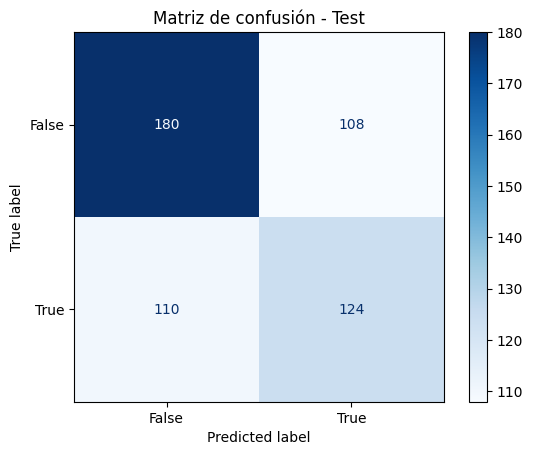

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Mostrar matriz de confusión con etiquetas
ConfusionMatrixDisplay.from_estimator(mejor_modelo, X_test, y_test, cmap='Blues')
plt.title("Matriz de confusión - Test")
plt.show()

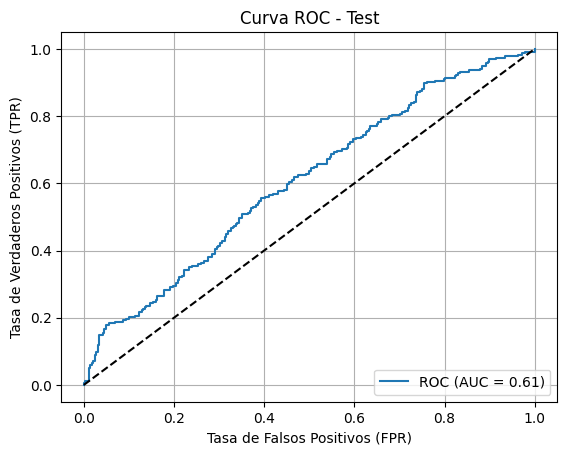

In [ ]:
from sklearn.metrics import roc_curve, auc

# Asegurarse de que WINNER tenga solo 2 clases (por ejemplo, 0 y 1)
# Probabilidades de clase positiva (1)
y_scores = mejor_modelo.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea aleatoria
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Test')
plt.legend(loc='lower right')
plt.grid()
plt.show()

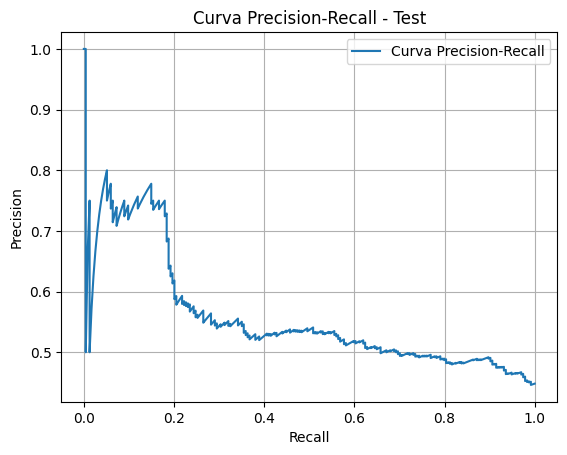

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recall, precision, label="Curva Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Test")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))

Accuracy: 0.5823754789272031
Precision: 0.5344827586206896
Recall: 0.5299145299145299
F1 Score: 0.5321888412017167
